# 데이터 분석 준비하기

* 데이터 출처 : https://github.com/youngwoos/Doit_R/#91
* 정리 : 

# 패키지 설치 및 로드하기

In [1]:
install.packages("foreign")

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"

In [2]:
# 패키지 설치
install.packages("foreign")

# 로드하기
library(foreign) # SPSS 파일 불러오기
library(dplyr)    # 전처리
library(ggplot2) # 시각화
library(readxl)  # 엑셀 파일 불러오기


Warning message:
"package 'foreign' is not available (for R version 3.6.1)"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 데이터 불러오기

In [3]:
# 데이터 불러오기
raw_welfare <- read.spss(file='Koweps_hpc10_2015_beta1.sav',
                        to.data.frame = T)    # to.data.frame = T  SPSS 파일을 데이터 프레임 형태로 변환하는 기능

# 복사본 만들기
welfare <- raw_welfare


Warning message in read.spss(file = "Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
"Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [4]:
welfare <- rename(welfare, sex = h10_g3, birth = h10_g4, marriage = h10_g10, religion = h10_g11, income = p1002_8aq1, code_job = h10_eco9, code_region = h10_reg7)


# 데이터 분석 절차

1단계 : 변수 검토 및 전처리  
- 변수의 특성을 파악하고 이상치를 정제한 다음 파생변수 만들기  
  
2단계 : 변수 간 관계 분석  
- 데이터를 요약한 표를 만든 후 분석 결과를 쉽게 이해할 수 있는 그래프 만들기

In [5]:
# 변수 검토하기
class(welfare$sex)
# class() = 변수의 타입을 확인하는 함수


[1] "numeric"

In [6]:
# 이상치 확인
table(welfare$sex)


   1    2 
7578 9086 

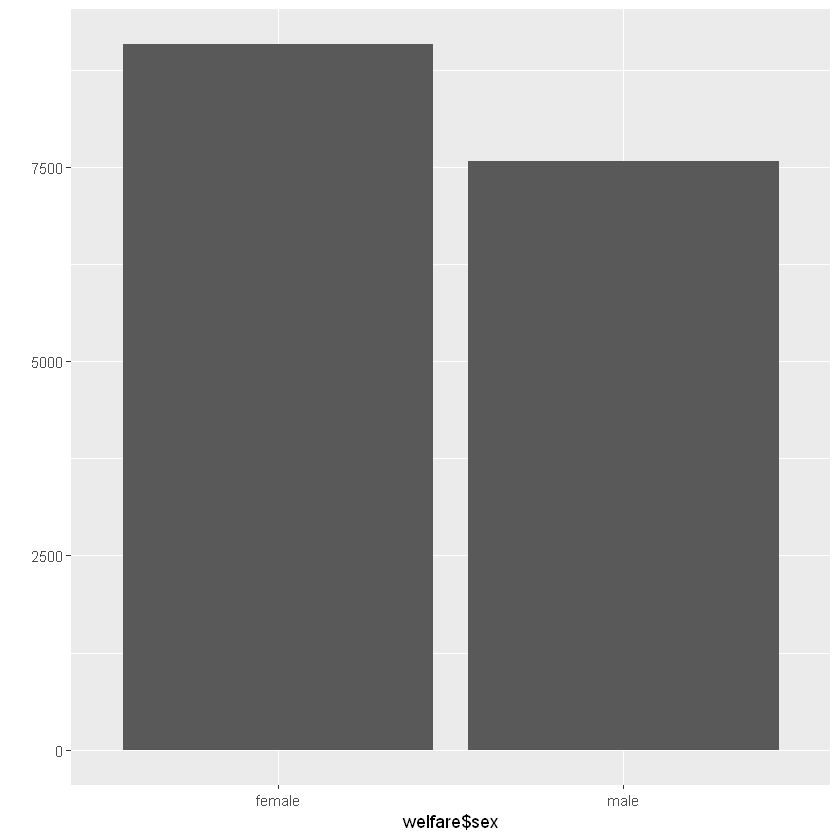

In [7]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female")
qplot(welfare$sex)

In [8]:
class(welfare$income)

[1] "numeric"

In [9]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."

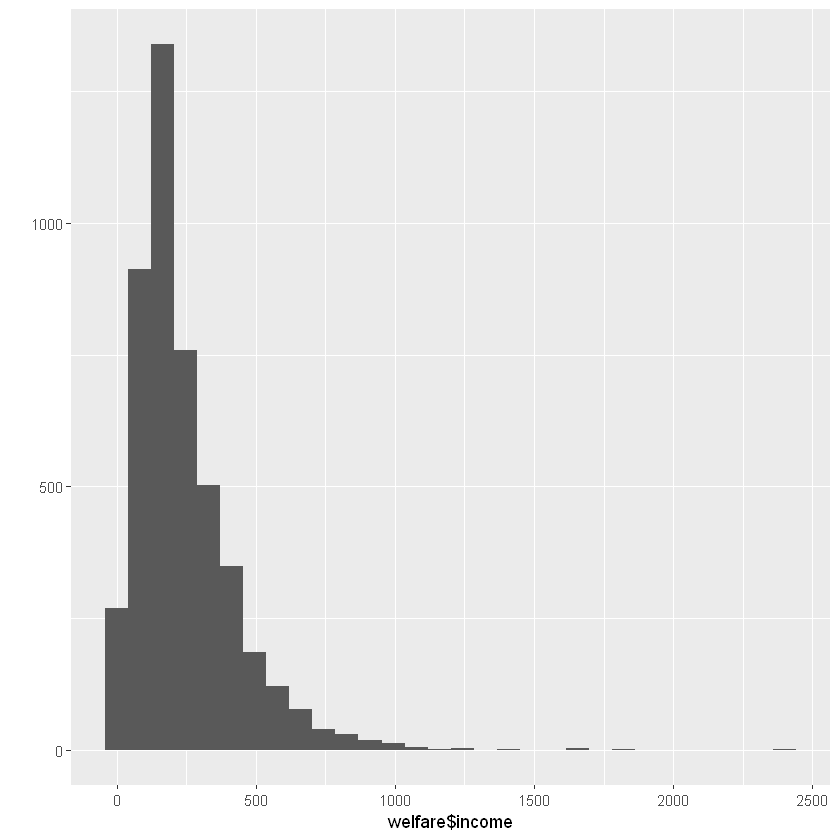

In [10]:
qplot(welfare$income)

In [11]:
# 이상치 결측 처리
welfare$income <- ifelse(welfare$income  %in% c(0, 9999), NA, welfare$income)

# 결측치 확인
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [12]:
# 성별 월급 평균표 만들기
sex_income <- welfare  %>% 
    filter(!is.na(income))  %>%
    group_by(sex)  %>% 
    summarise(mean_income = mean(income))
sex_income

sex,mean_income
female,163.2471
male,312.2932


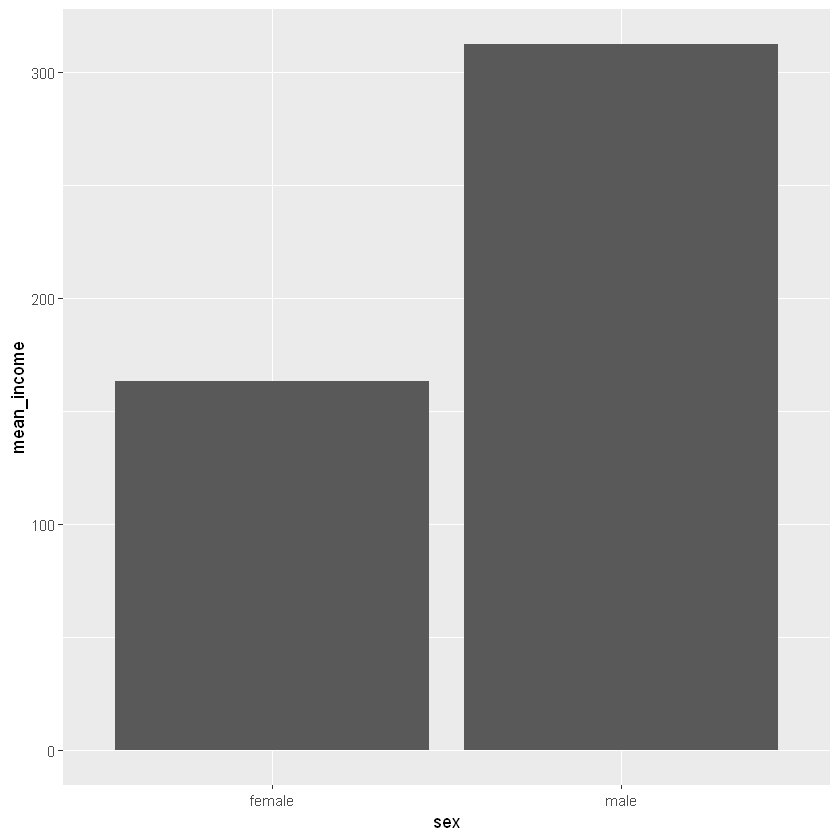

In [13]:
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

# 나이와 월급의 관계

In [14]:
class(welfare$birth)

[1] "numeric"

In [15]:
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


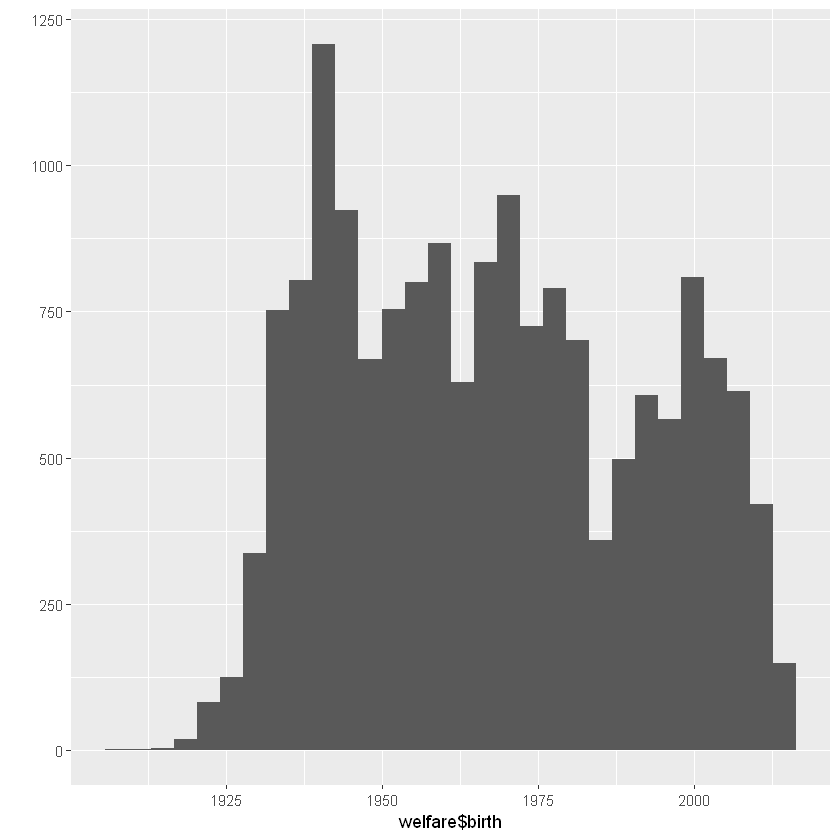

In [16]:
qplot(welfare$birth)

In [17]:
table(is.na(welfare$birth))


FALSE 
16664 

In [18]:
welfare$age <- 2015 - welfare$birth + 1
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


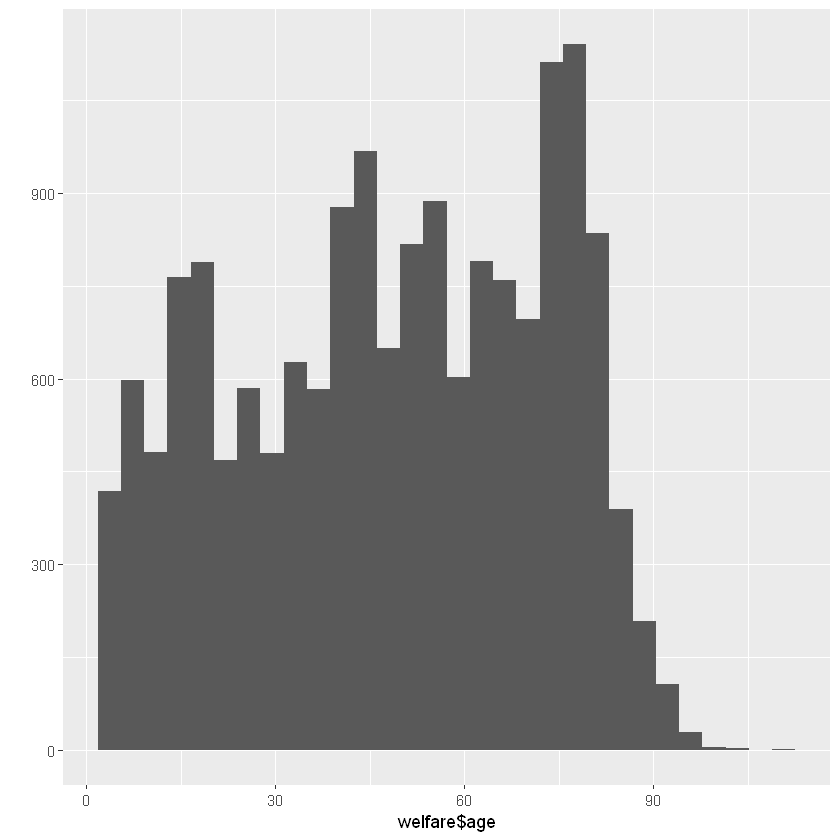

In [19]:
qplot(welfare$age)

In [20]:
# 나이에 따른 월급 평균표 만들기

age_income <- welfare  %>% 
    filter(!is.na(income))  %>% 
    group_by(age)  %>% 
    summarise(mean_income = mean(income))

head(age_income)


age,mean_income
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


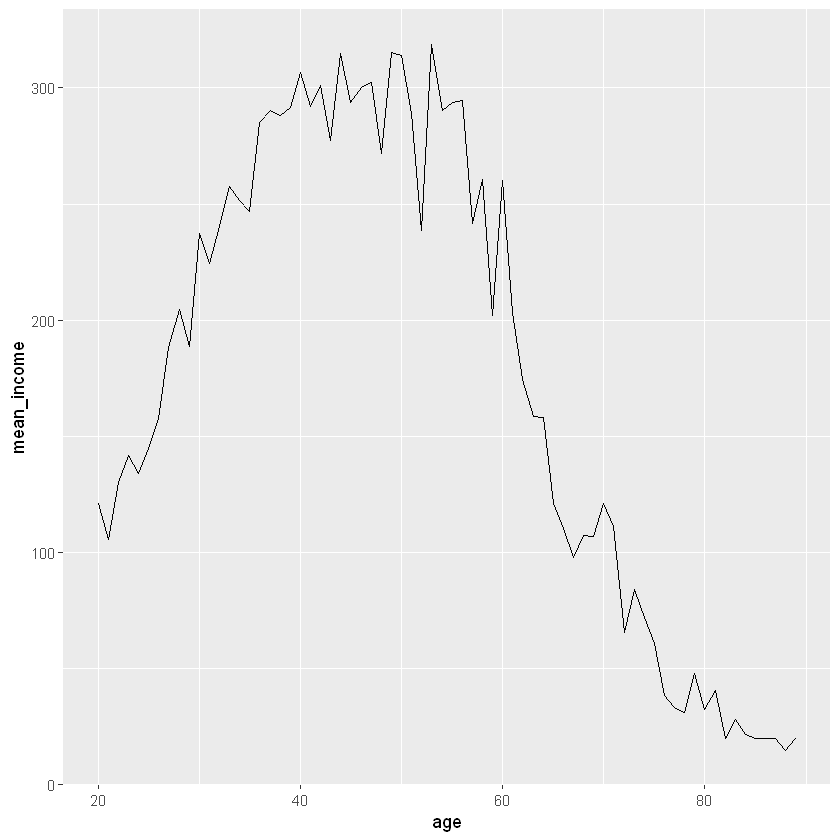

In [21]:
# 그래프 만들기

ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()

# 연령대에 따른 월급 차이

In [22]:
welfare <- welfare  %>% 
    mutate(ageg = ifelse(age < 30, "young",
                        ifelse(age <= 59, "middle", "old")))
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 

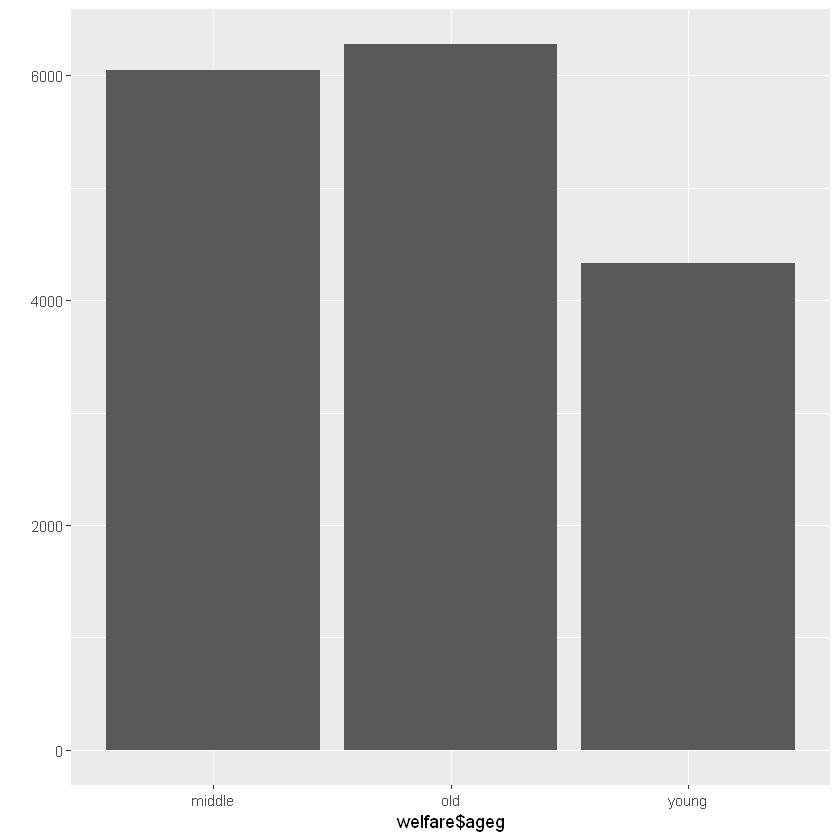

In [23]:
qplot(welfare$ageg)

In [24]:
# 
ageg_income  <- welfare  %>%
    filter(!is.na(income))  %>% 
    group_by(ageg)  %>% 
    summarise(mean_income = mean(income))

ageg_income

ageg,mean_income
middle,281.8871
old,125.3295
young,163.5953


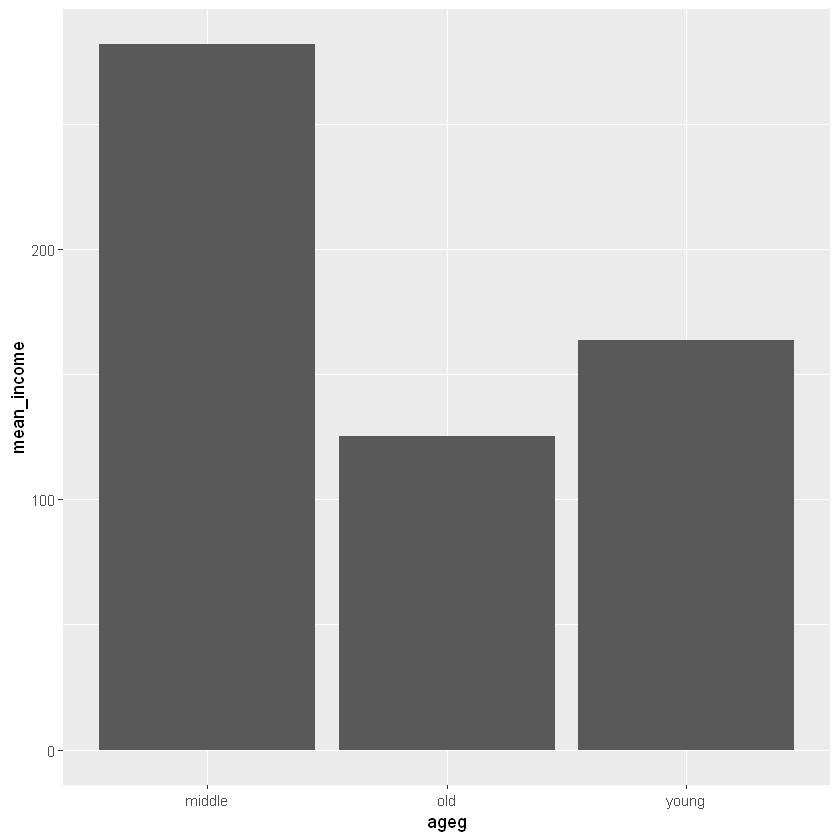

In [25]:
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col()

Warning message:
"Removed 1 rows containing missing values (position_stack)."

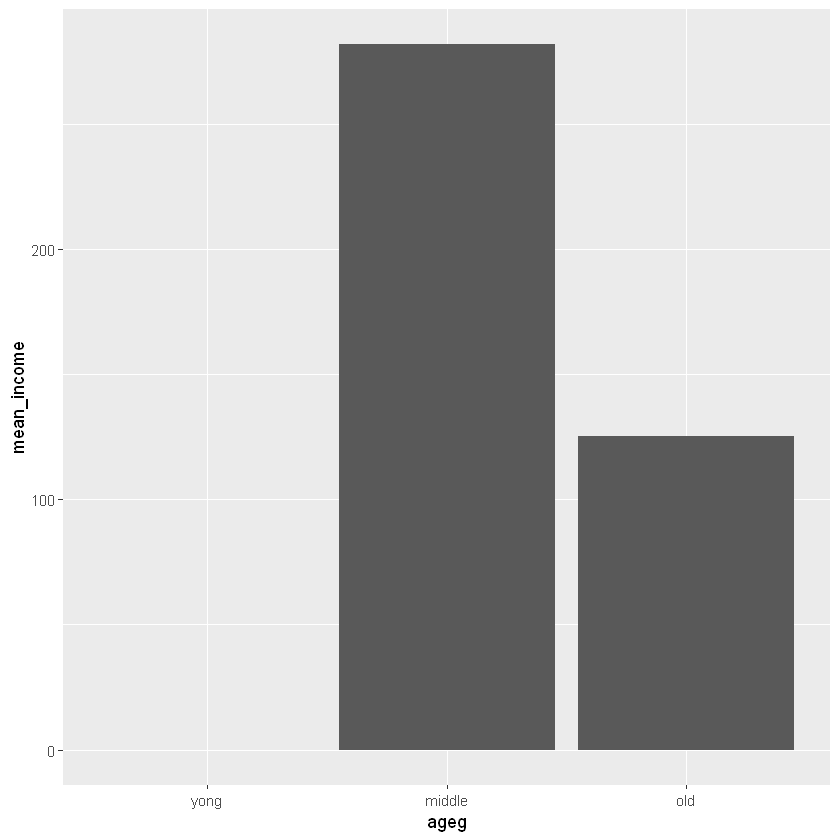

In [26]:
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col() +
    scale_x_discrete(limits = c("yong", 'middle', 'old'))

In [27]:
sex_income <- welfare  %>% 
    filter(!is.na(income))  %>% 
    group_by(ageg, sex)  %>% 
    summarise(mean_income = mean(income)) 
sex_income

ageg,sex,mean_income
middle,female,187.97552
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


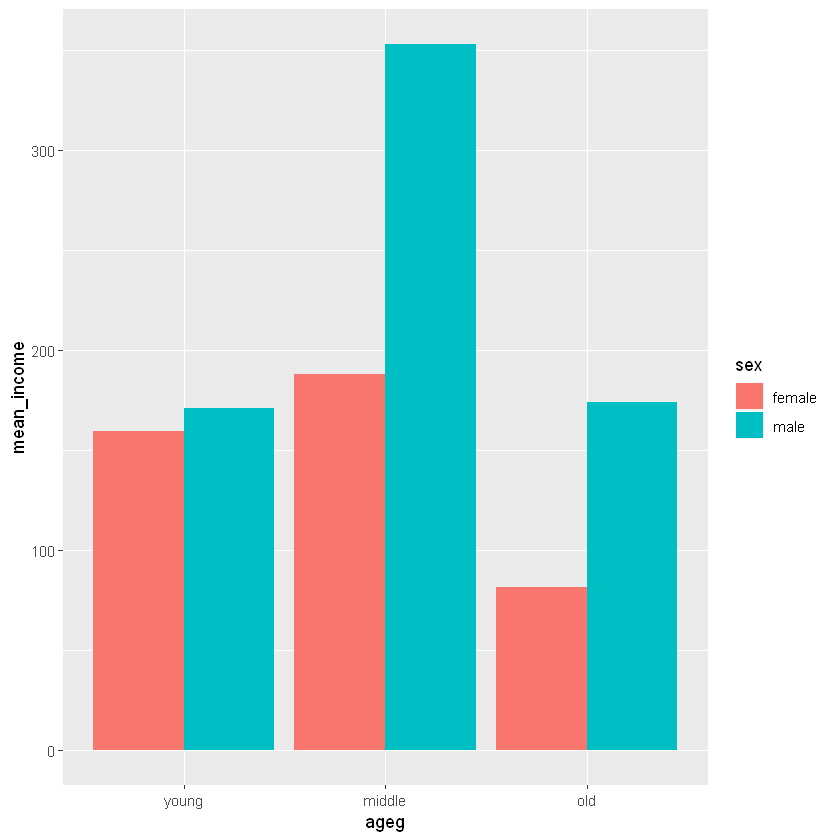

In [28]:
ggplot(data =sex_income, aes(x = ageg, y = mean_income, fill = sex)) + 
    geom_col(position = "dodge") +
    scale_x_discrete(limits = c("young", "middle", "old"))

In [29]:
 # 성별 연령별 월급 평균표 만들기

sex_age <- welfare  %>% 
    filter(!is.na(income))  %>% 
    group_by(age, sex)  %>% 
    summarise(mean_income = mean(income))

head(sex_age)

age,sex,mean_income
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


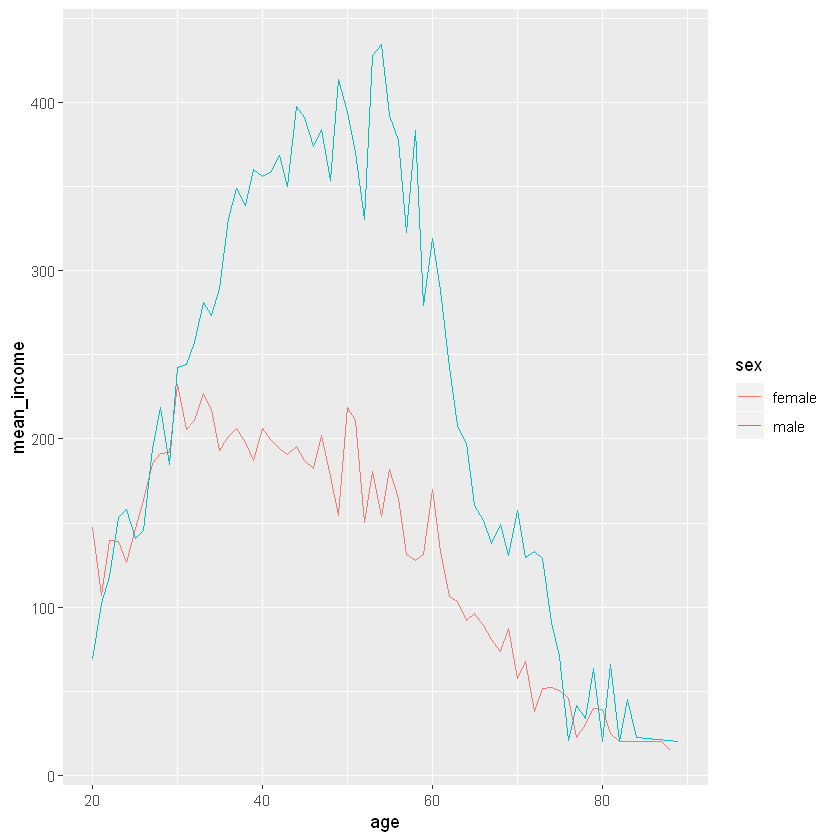

In [30]:
# 그래프 만들기
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) + geom_line()

In [31]:
class(welfare$code_job)

[1] "numeric"

In [32]:
table(welfare$code_job)


 111  120  131  132  133  134  135  139  141  149  151  152  153  159  211  212 
   2   16   10   11    9    3    7   10   35   20   26   18   15   16    8    4 
 213  221  222  223  224  231  232  233  234  235  236  237  239  241  242  243 
   3   17   31   12    4   41    5    3    6   48   14    2   29   12    4   63 
 244  245  246  247  248  251  252  253  254  259  261  271  272  273  274  281 
   4   33   59   77   38   14  111   24   67  109    4   15   11    4   36   17 
 283  284  285  286  289  311  312  313  314  320  330  391  392  399  411  412 
   8   10   26   16    5  140  260  220   84   75   15    4   13   87   47   12 
 421  422  423  429  431  432  441  442  510  521  522  530  611  612  613  620 
 124   71    5   14   20   33  154  197  192  353    5  106 1320   11   40    2 
 630  710  721  722  730  741  742  743  751  752  753  761  762  771  772  773 
  20   29   30   22   16   27    3   34   34    5   49   69   27   11   61   86 
 774  780  791  792  799  8

In [33]:
library(readxl)
list_job <- read_excel("Koweps_Codebook.xlsx", col_names = T, sheet = 2)
head(list_job)

code_job,job
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자


In [34]:
welfare <- left_join(welfare, list_job, id="code_job")


Joining, by = "code_job"


In [35]:
welfare  %>% 
    filter(!is.na(code_job))  %>% 
    select(code_job, job)  %>% 
    head(10)

code_job,job
942,경비원 및 검표원
762,전기공
530,방문 노점 및 통신 판매 관련 종사자
999,기타 서비스관련 단순 종사원
312,경영관련 사무원
254,문리 기술 및 예능 강사
510,영업 종사자
530,방문 노점 및 통신 판매 관련 종사자
286,스포츠 및 레크레이션 관련 전문가
521,매장 판매 종사자


직업별 월급 차이 분석하기

In [36]:
job_income <- welfare  %>% 
    filter(!is.na(job) & !is.na(income))  %>% 
    group_by(job)  %>% 
    summarise(mean_income = mean(income))

head(job_income)

job,mean_income
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [37]:
top10 <- job_income  %>% 
    arrange(desc(mean_income))  %>% 
    head(10)

top10

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


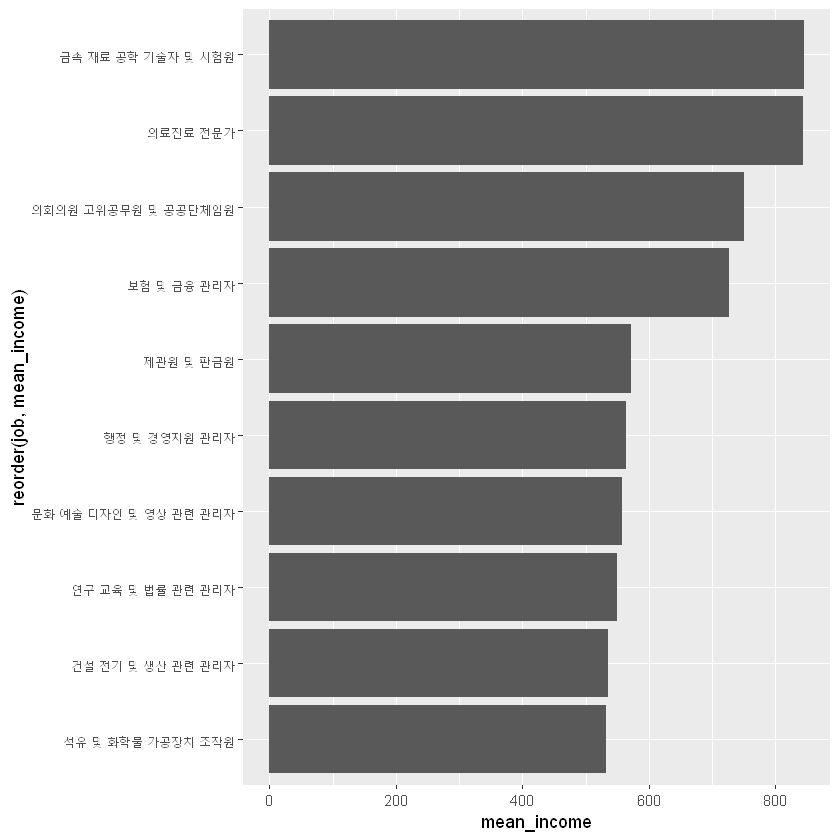

In [38]:
ggplot(data = top10, aes(x = reorder(job, mean_income), y = mean_income)) +
    geom_col() + 
    coord_flip()

In [39]:
# 하위 10위 추출
bottom10 <- job_income  %>% 
    arrange(mean_income)  %>% 
    head(10)
bottom10

job,mean_income
가사 및 육아 도우미,80.16648
임업관련 종사자,83.33000
기타 서비스관련 단순 종사원,88.22101
청소원 및 환경 미화원,88.78775
약사 및 한약사,89.00000
작물재배 종사자,92.00000
농립어업관련 단순 종사원,101.58125
의료 복지 관련 서비스 종사자,103.52643
음식관련 단순 종사원,107.84511
판매관련 단순 종사원,116.82203


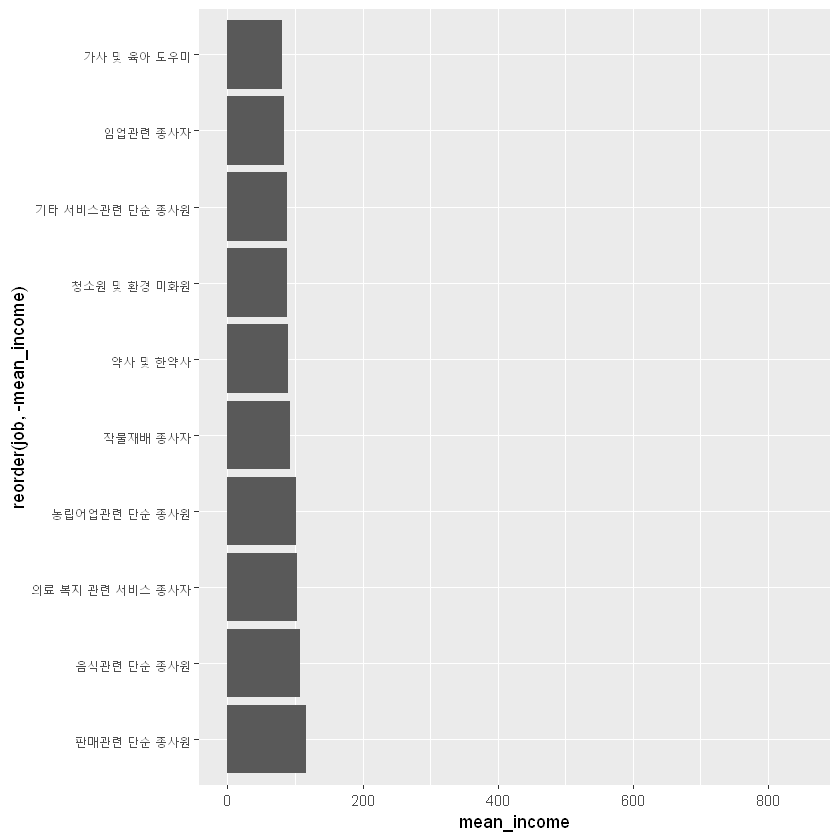

In [40]:
# 그래프 만들기

ggplot(data = bottom10, aes(x = reorder(job, -mean_income), 
                           y = mean_income)) +
    geom_col() +
    coord_flip() +
    ylim(0, 850)

# 성별 직업 빈도

In [41]:
# 남성 직업 빈도 상위 10개 추출

job_male <- welfare  %>% 
    filter(!is.na(job) & sex == "male")  %>% 
    group_by(job)  %>% 
    summarise(n = n())  %>% 
    arrange(desc(n))  %>% 
    head(10)
job_male

job,n
작물재배 종사자,640
자동차 운전원,251
경영관련 사무원,213
영업 종사자,141
매장 판매 종사자,132
제조관련 단순 종사원,104
청소원 및 환경 미화원,97
건설 및 광업 단순 종사원,95
경비원 및 검표원,95
행정 사무원,92


In [42]:
# 여성 직업 빈도 상위 10개 추출
job_female <- welfare  %>% 
    filter(!is.na(job) & sex == "female")  %>% 
    group_by(job)  %>% 
    summarise(n = n())  %>% 
    arrange(desc(n))  %>% 
    head(10)
job_female

job,n
작물재배 종사자,680
청소원 및 환경 미화원,228
매장 판매 종사자,221
제조관련 단순 종사원,185
회계 및 경리 사무원,176
음식서비스 종사자,149
주방장 및 조리사,126
가사 및 육아 도우미,125
의료 복지 관련 서비스 종사자,121
음식관련 단순 종사원,104


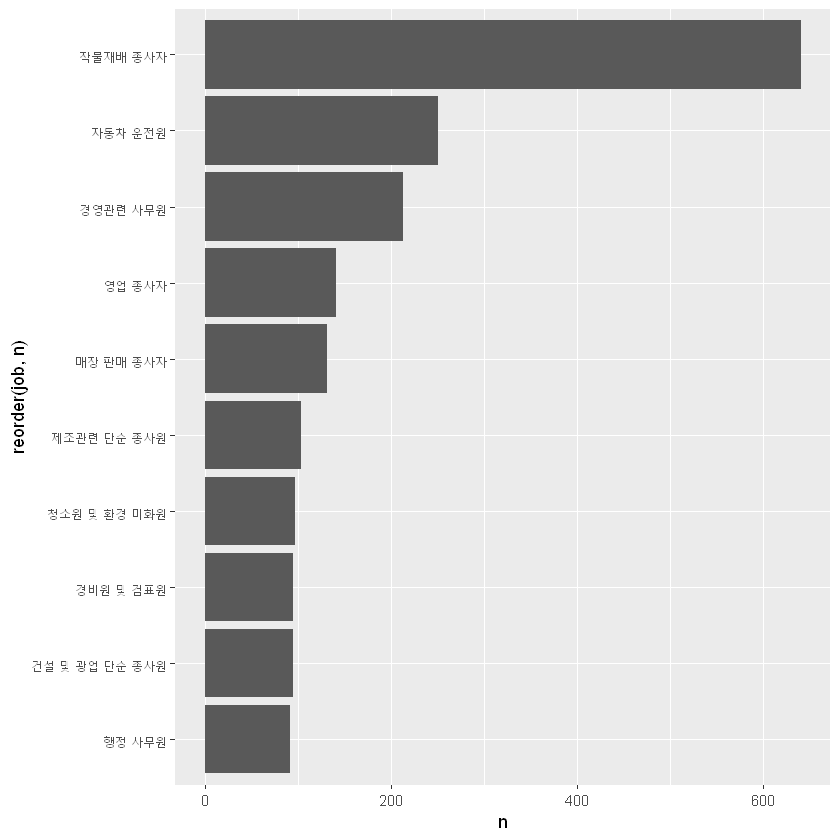

In [43]:
# 남성 직업 빈도 상위 10개 직업
ggplot(data = job_male, aes(x = reorder(job, n), y = n)) +
    geom_col() +
    coord_flip()

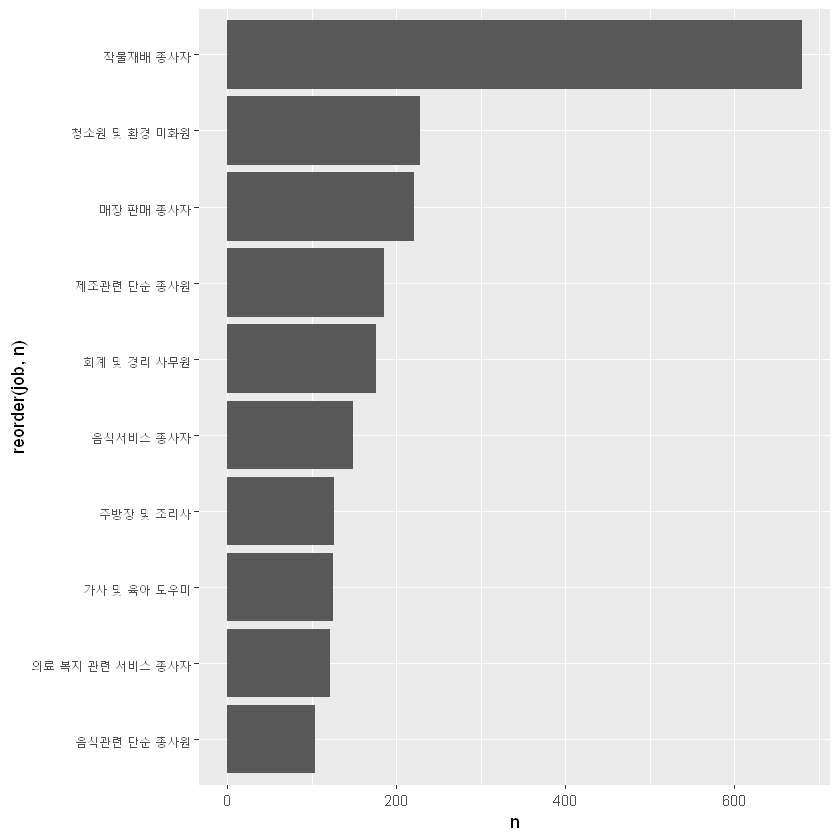

In [44]:
# 여성 직업 빈도 상위 10개 직업
ggplot(data = job_female, aes(x = reorder(job, n), y = n)) +
    geom_col() +
    coord_flip()

# 종교 유무에 따른 이혼율

## 1. 종교 변수 검토 및 전처리하기

### 변수 검토하기

In [45]:
class(welfare$religion)

[1] "numeric"

In [46]:
table(welfare$religion)


   1    2 
8047 8617 

### 전처리

In [47]:
# 종교 유무 이름 부여

welfare$religion <- ifelse(welfare$religion == 1, "yes", "no")
table(welfare$religion)


  no  yes 
8617 8047 

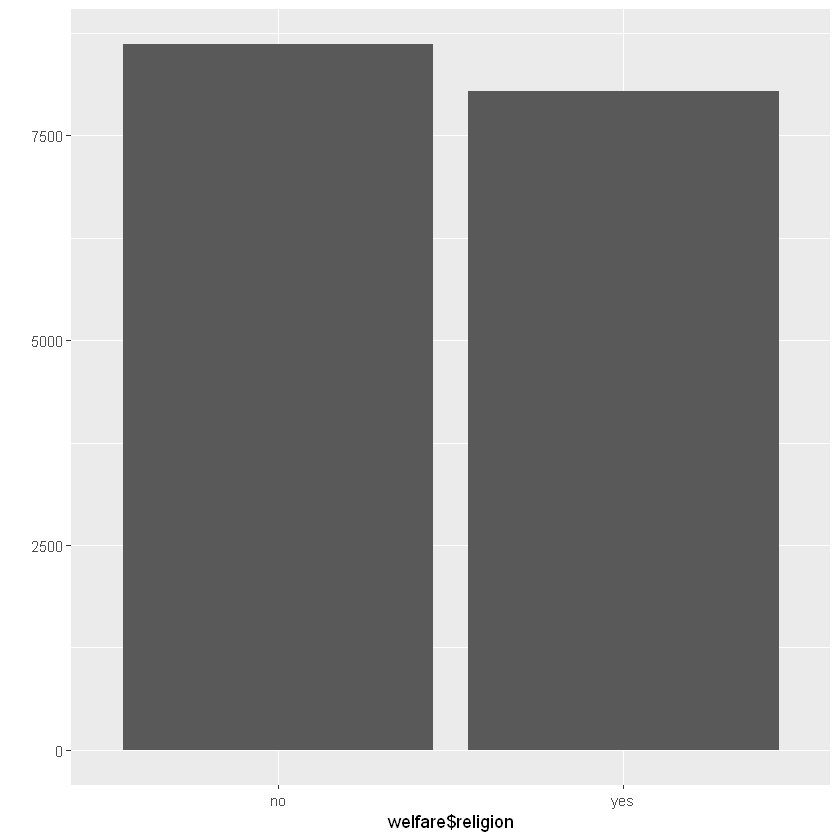

In [48]:
qplot(welfare$religion)

## 2. 혼인 상태 변수 검토 및 전처리하기

### 변수 검토하기

In [49]:
class(welfare$marriage)

[1] "numeric"

In [50]:
table(welfare$marriage)


   0    1    2    3    4    5    6 
2861 8431 2117  712   84 2433   26 

In [51]:
# 이혼 여부 변수 만들기
welfare$group_marriage <- ifelse(welfare$marriage == 1, "marriage",
                                ifelse(welfare$marriage == 3, "divorce", NA))
table(welfare$group_marriage)


 divorce marriage 
     712     8431 


FALSE  TRUE 
 9143  7521 

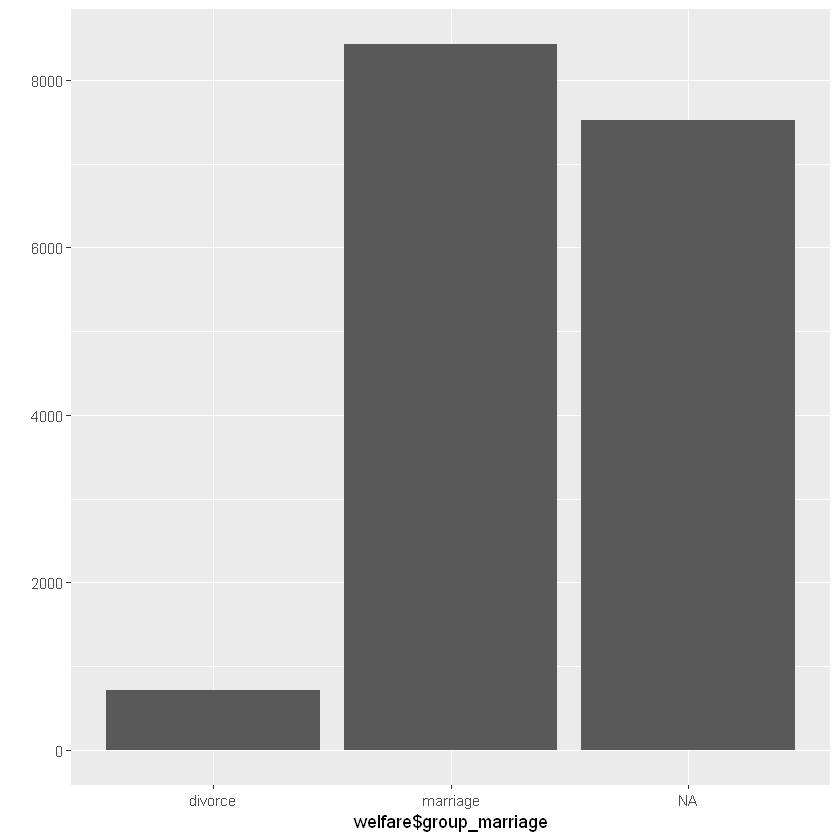

In [52]:
table(is.na(welfare$group_marriage))

qplot(welfare$group_marriage)

In [53]:
religion_marriage <- welfare  %>% 
    filter(!is.na(group_marriage))  %>% 
    group_by(religion, group_marriage)  %>% 
    summarise(n = n())  %>% 
    mutate(tot_group = sum(n)) %>% 
    mutate(pct = round(n/tot_group*100, 1))

religion_marriage

religion,group_marriage,n,tot_group,pct
no,divorce,384,4602,8.3
no,marriage,4218,4602,91.7
yes,divorce,328,4541,7.2
yes,marriage,4213,4541,92.8


In [54]:
religion_marriage <- welfare  %>% 
    filter(!is.na(group_marriage))  %>%
    count(religion, group_marriage)  %>% 
    group_by(religion)  %>% 
    mutate(pct = round(n/sum(n)*100, 1)) 

In [55]:
# 이혼 추출
divorce <- religion_marriage  %>% 
    filter(group_marriage == "divorce")  %>% 
    select(religion, pct)
divorce

religion,pct
no,8.3
yes,7.2


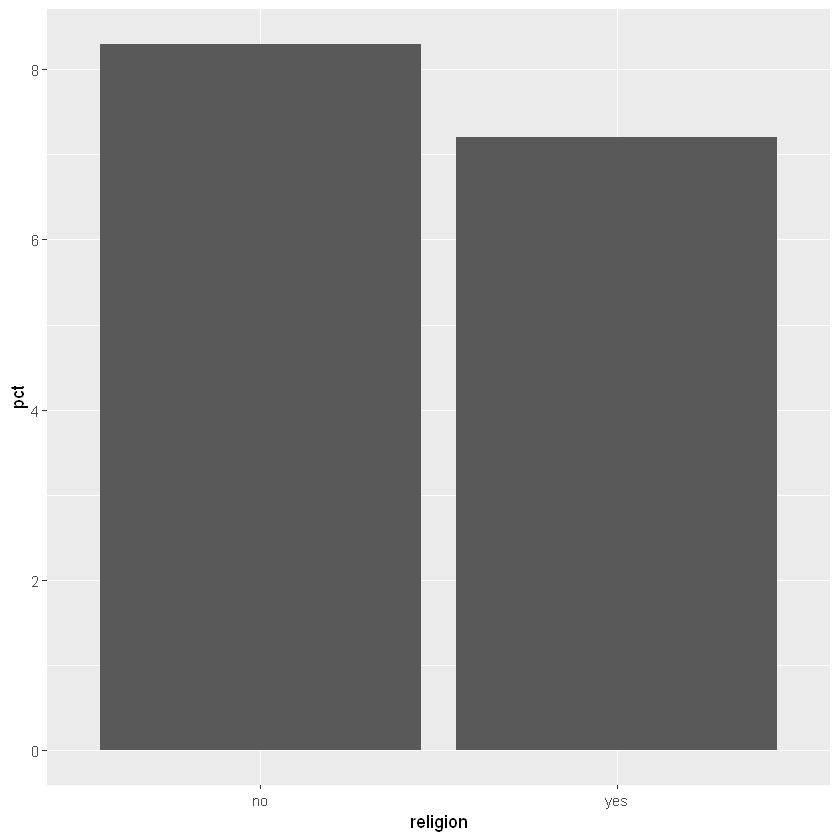

In [56]:
ggplot(data = divorce, aes(x = religion, y = pct)) + geom_col()

## 3. 종교 유무에 따른 이혼율 분석하기

### 1. 종교 유무에 따른 이혼율 표 만들기

In [57]:
religion_marriage <- welfare  %>% 
    filter(!is.na(group_marriage))  %>% 
    group_by(religion, group_marriage)  %>% 
    summarise(n = n())  %>% 
    mutate(tot_group = sum(n))  %>% 
    mutate(pct = round(n/tot_group*100, 1))
religion_marriage

# count() 이용
# religion_marriage <- welfare  %>% 
#     filter(!is.na(group_marriage))  %>%
#     count(religion, group_marriage)
#     group_by(religion, group_marriage)  %>% 
#     mutate(pct = round(n/tot_group*100, 1))
# religion_marriag

religion,group_marriage,n,tot_group,pct
no,divorce,384,4602,8.3
no,marriage,4218,4602,91.7
yes,divorce,328,4541,7.2
yes,marriage,4213,4541,92.8


In [58]:
# 이혼 추출
divorce <- religion_marriage  %>% 
    filter(group_marriage == "divorce")  %>% 
    select(religion, pct)

divorce

religion,pct
no,8.3
yes,7.2


### 그래프만들기

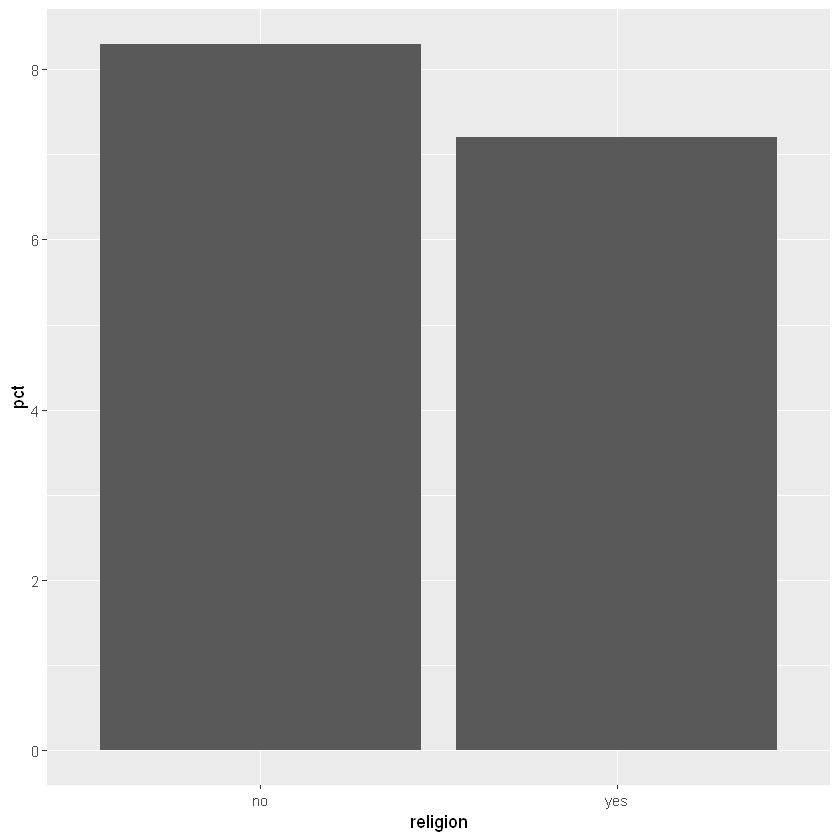

In [59]:
ggplot(data = divorce, aes(x = religion, y = pct)) + geom_col()


## 4. 연령대 및 종교 유무에 따른 이혼율 분석하기

### 1. 연령대별 이혼율 표 만들기

In [70]:
ageg_marriage <- welfare  %>% 
    filter(!is.na(group_marriage))  %>% 
    group_by(ageg, group_marriage)  %>% 
    summarise(n = n())  %>% 
    mutate(tot_group = sum(n))  %>% 
    mutate(pct = round(n/tot_group*100, 1))

# age_marriage <- welfare  %>% 
#     filter(!is.na(group_marriage))  %>%
#     count(ageg, group_marriage)  %>% 
#     group_by(ageg, group_marriage)  %>% 
#     mutate(pct = round(n/tot_group*100, 1))



In [71]:
# 초년 제외, 이혼 추출

ageg_divorce <- ageg_marriage  %>% 
    filter(ageg != "young" & group_marriage == "divorce")  %>% 
    select(ageg, pct)
ageg_divorce

ageg,pct
middle,8.9
old,6.6


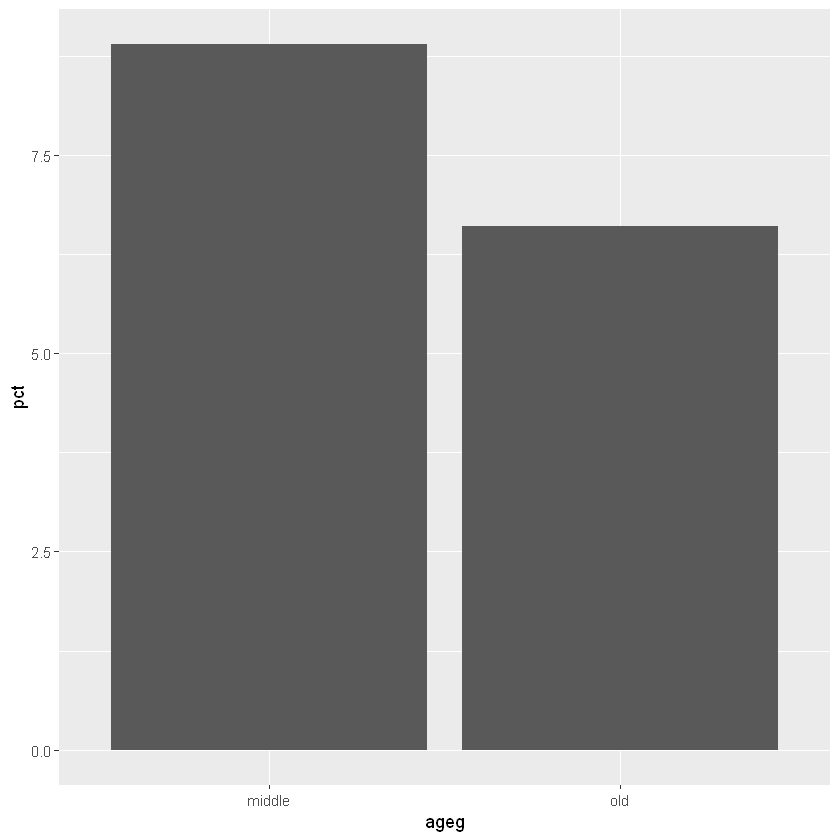

In [72]:
ggplot(data = ageg_divorce, aes(x = ageg, y = pct)) + geom_col()

### 연령대 및 종교 유무에 따른 이혼율 표 만들기

In [76]:
# 연령대, 종교 유무, 결혼 상태별 비율표 만들기

ageg_religion_marriage <- welfare  %>% 
    filter(!is.na(group_marriage)  & ageg != "young")  %>% 
    group_by(ageg, religion, group_marriage)  %>% 
    summarise(n = n())  %>% 
    mutate(tot_group = sum(n))  %>% 
    mutate(pct = round(n/tot_group*100, 1))
ageg_religion_marriage

# ageg_religion_marriage <- welfare  %>% 
#     filter(!is.na(group_marriage)  & ageg != "young")  %>%
#     count(ageg, religion, group_marriage)  %>% 
#     group_by(ageg, religion, group_marriage)  %>% 
#     mutate(pct = round(n/tot_group*100, 1))

ageg,religion,group_marriage,n,tot_group,pct
middle,no,divorce,260,2681,9.7
middle,no,marriage,2421,2681,90.3
middle,yes,divorce,177,2237,7.9
middle,yes,marriage,2060,2237,92.1
old,no,divorce,123,1884,6.5
old,no,marriage,1761,1884,93.5
old,yes,divorce,150,2281,6.6
old,yes,marriage,2131,2281,93.4


In [77]:
# 연령대 및 종교 유무별 이혼율 표 만들기
df_divorce <- ageg_religion_marriage  %>% 
    filter(group_marriage == "divorce")  %>% 
    select(ageg, religion, pct)
df_divorce

ageg,religion,pct
middle,no,9.7
middle,yes,7.9
old,no,6.5
old,yes,6.6


### 연령대 및 종교 유무에 따른 이혼율 그래프 

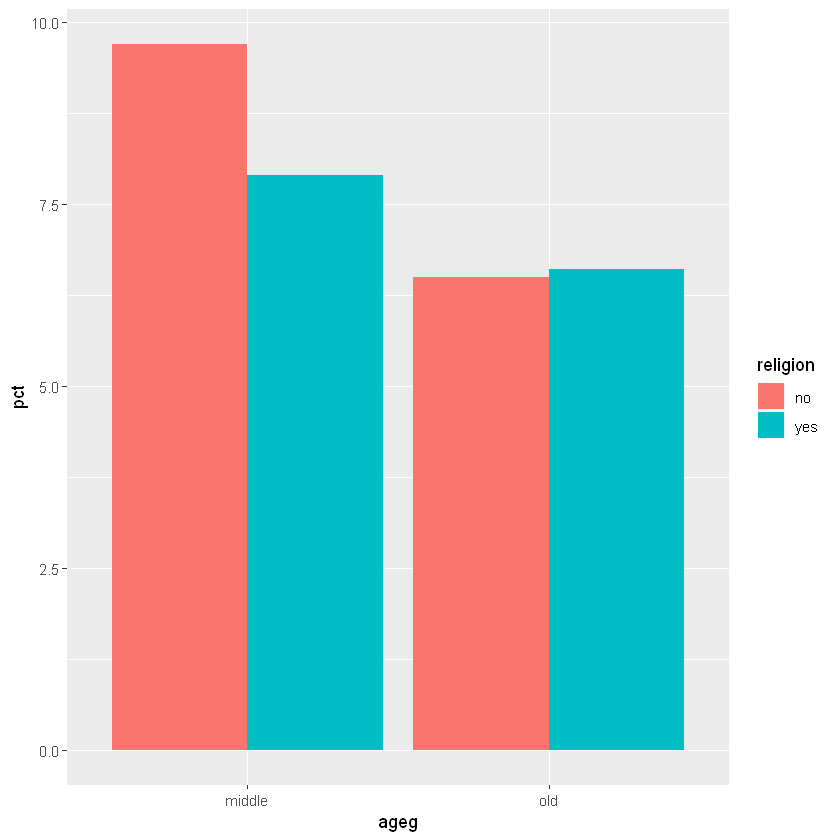

In [78]:
ggplot(data = df_divorce, aes(x = ageg, y = pct, fill = religion)) + geom_col(position = "dodge")

## 지역별 연령대 비율

In [79]:
class(welfare$code_region)

[1] "numeric"

In [80]:
table(welfare$code_region)


   1    2    3    4    5    6    7 
2486 3711 2785 2036 1467 1257 2922 

In [81]:
# 지역 코드 목록 만들기
list_region <- data.frame(code_region = c(1:7),
                         region = c("서울", 
                                   "수도권(인천/경기)",
                                   "부산/경남/울산)",
                                   "대구/경북",
                                   "대전/충남",
                                   "강원/충북",
                                   "광주/전남/전북/제주도"))
list_region                                  

code_region,region
1,서울
2,수도권(인천/경기)
3,부산/경남/울산)
4,대구/경북
5,대전/충남
6,강원/충북
7,광주/전남/전북/제주도


In [82]:
# 지역명 변수 추가
welfare <- left_join(welfare, list_region, id="code_region")

welfare  %>% 
    select(code_region, region)  %>% 
    head

Joining, by = "code_region"


code_region,region
1,서울
1,서울
1,서울
1,서울
1,서울
1,서울


## 지역별 연령대 비율 분석하기

### 지역별 연령대 비율표

In [84]:
region_ageg <- welfare  %>% 
    group_by(region, ageg)  %>% 
    summarise(n = n())  %>% 
    mutate(tot_group = sum(n))  %>% 
    mutate(pct = round(n/tot_group*100, 2))
head(region_ageg)

region,ageg,n,tot_group,pct
강원/충북,middle,417,1257,33.17
강원/충북,old,555,1257,44.15
강원/충북,young,285,1257,22.67
광주/전남/전북/제주도,middle,947,2922,32.41
광주/전남/전북/제주도,old,1233,2922,42.20
광주/전남/전북/제주도,young,742,2922,25.39


In [85]:
region_ageg <- welfare  %>% 
    count(region, ageg)  %>% 
    group_by(region)  %>% 
    mutate(pct = round(n/sum(n)*100, 2))

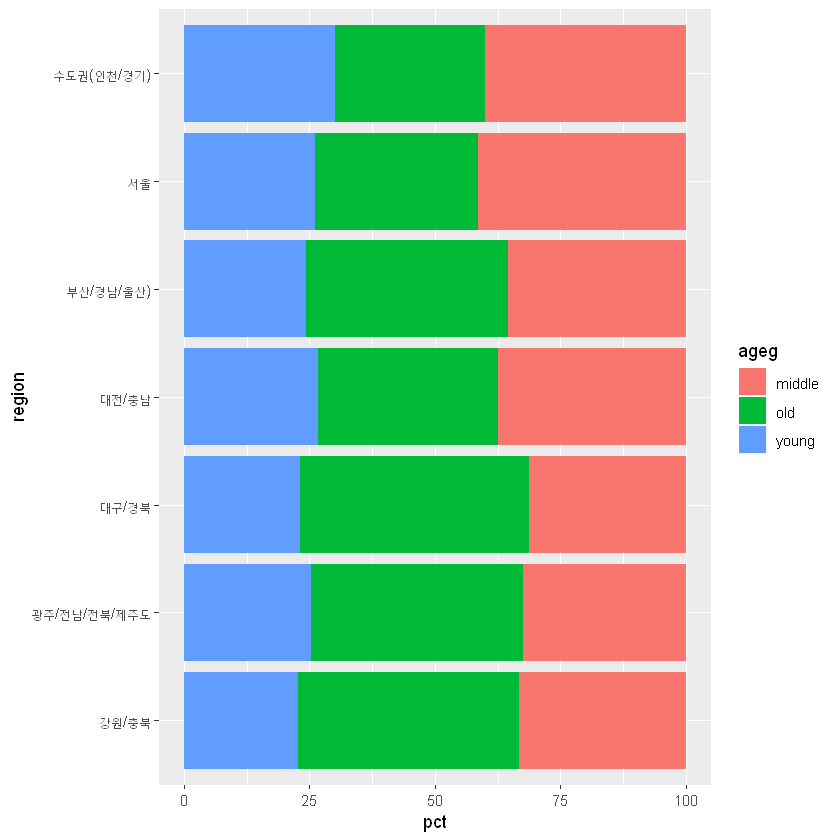

In [86]:
ggplot(data=region_ageg, aes(x = region, y = pct, fill = ageg)) + 
    geom_col() +
    coord_flip()

### 노년층 비율 높은 순으로 막대 정렬하기


In [88]:
# 노년층 비율 내림차순 정렬
list_order_old <- region_ageg  %>% 
    filter(ageg == "old")  %>% 
    arrange(pct)
list_order_old

region,ageg,n,pct
수도권(인천/경기),old,1109,29.88
서울,old,805,32.38
대전/충남,old,527,35.92
부산/경남/울산),old,1124,40.36
광주/전남/전북/제주도,old,1233,42.20
강원/충북,old,555,44.15
대구/경북,old,928,45.58


In [89]:
# 지역명 순서 변수 만들기
order <- list_order_old$region
order

[1] 수도권(인천/경기)     서울                  대전/충남            
[4] 부산/경남/울산)       광주/전남/전북/제주도 강원/충북            
[7] 대구/경북            
7 Levels: 강원/충북 광주/전남/전북/제주도 대구/경북 ... 수도권(인천/경기)

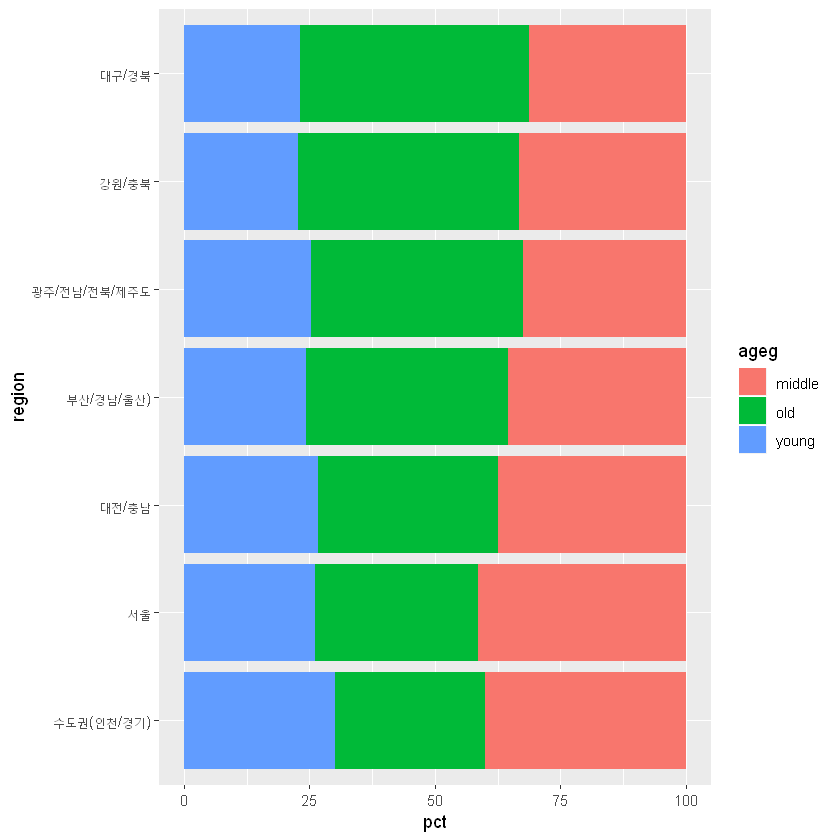

In [91]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + 
    geom_col() +
    coord_flip() +
    scale_x_discrete(limits = order)


### 연령대순으로 막대 색깔 나열하기

In [93]:
class(region_ageg$ageg)

[1] "character"

In [95]:
region_ageg$ageg <- factor(region_ageg$ageg, 
                         level = c("old", "middle", "young"))

class(region_ageg$ageg)

[1] "factor"

In [96]:
levels(region_ageg$ageg)

[1] "old"    "middle" "young"

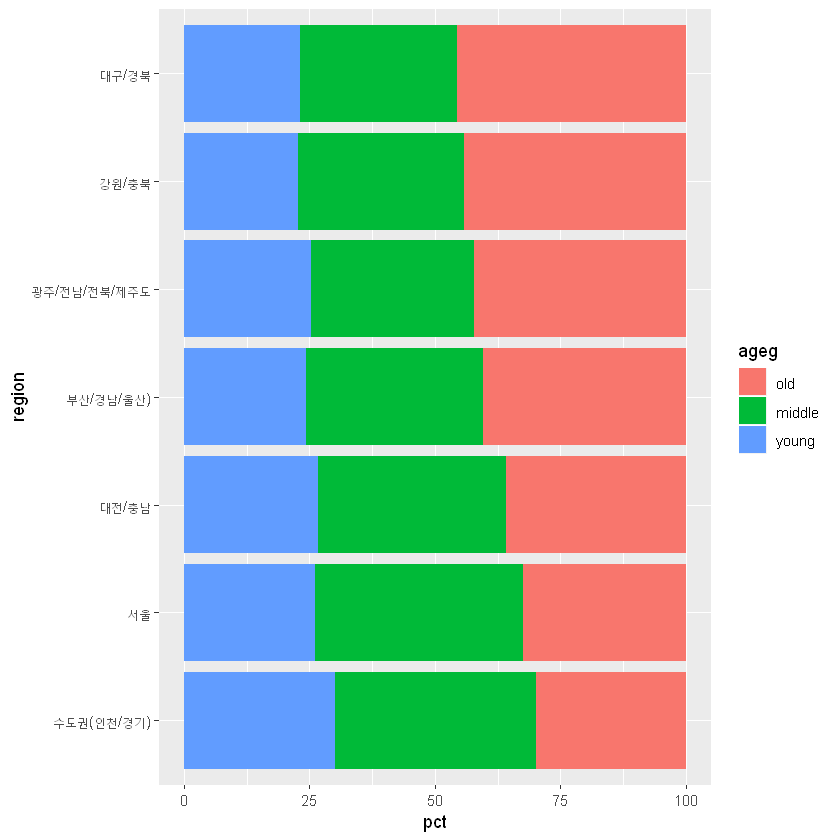

In [98]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + 
    geom_col() +
    coord_flip() +
    scale_x_discrete(limits = order)